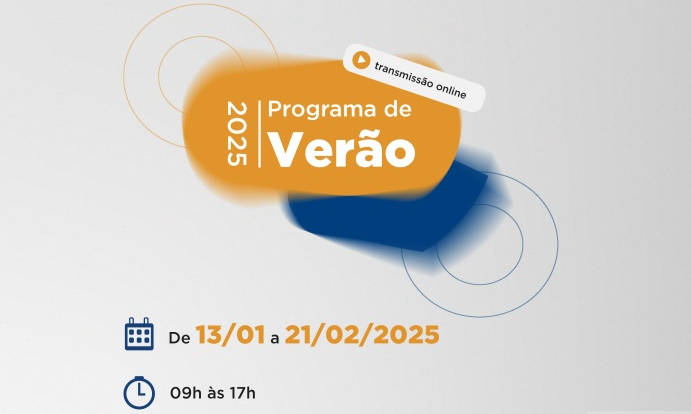

# FGV Summer Program 2025
## Recommender Systems class 1 - Introduction to the Movielens dataset
Diego Galeano, Ph.D.

$\color{green}{\text{Before starting}}$ let's run the following cell to have all the required libraries for this notebook.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import os
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The Movielens dataset

There are a number of datasets that are available for recommendation research. Amongst them, the [MovieLens](https://movielens.org/) dataset is probably one of the more popular ones. MovieLens is a non-commercial web-based movie recommender system. It is created in 1997 and run by GroupLens, a research lab at the University of Minnesota, in order to gather movie rating data for research purposes.  MovieLens data has been critical for several research studies including personalized recommendation and social psychology.

### Getting the Data

The MovieLens dataset is hosted by the [GroupLens](https://grouplens.org/datasets/movielens/) website. Several versions are available. We will use the MovieLens 100K dataset :cite:`Herlocker.Konstan.Borchers.ea.1999`.  This dataset is comprised of $100,000$ ratings, ranging from 1 to 5 stars, from 943 users on 1682 movies. It has been cleaned up so that each user has rated at least 20 movies. Some simple demographic information such as age, gender, genres for the users and items are also available.  We can download the [ml-100k.zip](http://files.grouplens.org/datasets/movielens/ml-100k.zip) and extract the `u.data` file, which contains all the $100,000$ ratings in the csv format. There are many other files in the folder, a detailed description for each file can be found in the [README](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) file of the dataset.

In [5]:
# Define the base path to your Google Drive
base_path = '/content/drive/My Drive/5. Teaching/FGV 2025/programming exercises/ml-100k/'
file_name = 'u.data'

# Construct the full file path
file_path = base_path + file_name

column_names = ['user_id', 'item_id', 'rating', 'time_stamp']
data = pd.read_csv(file_path, sep='\t', header=None, names=column_names )

# read also the item data
item_df = pd.read_csv(base_path + 'u.item', sep='|', encoding='latin-1', header=None)[[0,1,2]]
item_df.columns = ['item_id', 'movie_name', 'release_date']

In [6]:
data.head()

,user_id,item_id,rating,time_stamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
item_df.head()

,item_id,movie_name,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [8]:
data = data.merge(item_df, on = 'item_id')

We can see that each line consists of four columns, including "user id" 1-943, "item id" 1-1682, "rating" 1-5 and "timestamp". We can construct an interaction matrix of size $n \times m$, where $n$ and $m$ are the number of users and the number of items respectively. This dataset only records the existing ratings, so we can also call it rating matrix and we will use interaction matrix and rating matrix interchangeably in case that the values of this matrix represent exact ratings. Most of the values in the rating matrix are unknown as users have not rated the majority of movies.

In [9]:
data.head()

,user_id,item_id,rating,time_stamp,movie_name,release_date
0,196,242,3,881250949,Kolya (1996),24-Jan-1997
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997


# Statistics of the dataset

***Task 1*: obtain/calculate and print the number of users, number of items, number of ratings.**

In [ ]:
n_users = None # one line code
n_items = None # one line code
n_ratings = None# one line code

print('number of users = ', n_users )
print('number of items = ', n_items )
print('number of ratings = ', n_ratings )

number of users =  943
number of items =  1682
number of ratings =  100000


We also show the sparsity of this dataset. The sparsity is defined as `1 - number of nonzero entries / ( number of users * number of items)`. Clearly, the interaction matrix is extremely sparse (i.e., sparsity = 93.695%). Real world datasets may suffer from a greater extent of sparsity and has been a long-standing challenge in building recommender systems. A viable solution is to use additional side information such as user/item features to alleviate the sparsity.

**Task 2: calculate the sparsity and density**

In [ ]:
density = None# one line code
sparsity = None# one line code

print('density (%) = ', 100*density)
print('sparsity (%) = ', 100*sparsity)

density (%) =  6.304669364224531
sparsity (%) =  93.69533063577546


Now, let's look at the ratings. Is there a bias towards certain rating values?

**Task 3: Plot the histogram of rating values available**

Hint: use histplot from seaborn (parameter discrete = True for better visualization)

<Axes: xlabel='rating', ylabel='Count'>

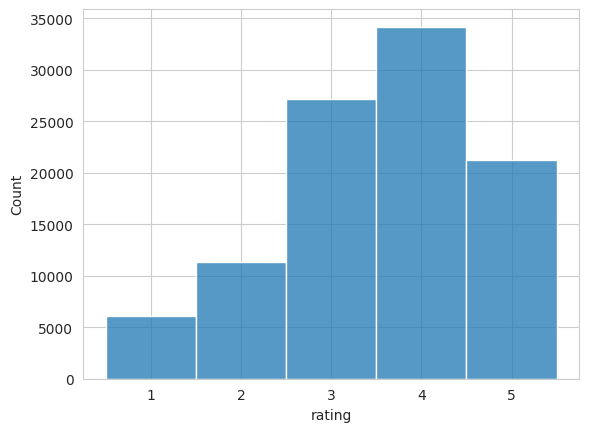

In [ ]:
sns.set_style("whitegrid")
# one line code

**Task 4: Calculate the mean rating for all the users and for a selected user**

In [ ]:
mu_all =None# one line code
mu_user_j = None# one line code

print('mean rating all users =', mu_all)
print('mean rating user j =', mu_user_j)

mean rating all users = 3.52986
mean rating user j = 3.84375


**Task 5: Find the top-10 users that watch the most amount of movies and print them with their movie counts.**

Hint: use the value_counts() method of the dataframe and use head for visualization of the top values

In [ ]:
# one line code

,count
user_id,
405,737
655,685
13,636
450,540
276,518
416,493
537,490
303,484
234,480


**Task 6: Find the top-10 popular movies that were watch by most users. Print the name of the movies.**

In [ ]:
# one line code

,count
movie_name,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
"English Patient, The (1996)",481
Scream (1996),478
Toy Story (1995),452
Air Force One (1997),431


**Task 7: What is the percentage of users that have seen the 10 most popular movies?**

In [ ]:
# obtain the top-10 most popular movies with the counts of users
df = data.item_id.value_counts().head(10)
# obtain the index of the most popular movies
IDTop_movies = list(df.index)

# subset of the data that contain the top movies
data_subset = data[data['item_id'].isin(IDTop_movies)]

# calculate the percentage of users
percentage_users = # one line code
print(percentage_users)

98.3032873806999


**Task 8: Plot the number of movies rated by each user (ordered in descending order)**

Hint: use lineplot from seaborn, y-axis: number of movies, x-axis: user_id

Text(0.5, 0, 'users ordered')

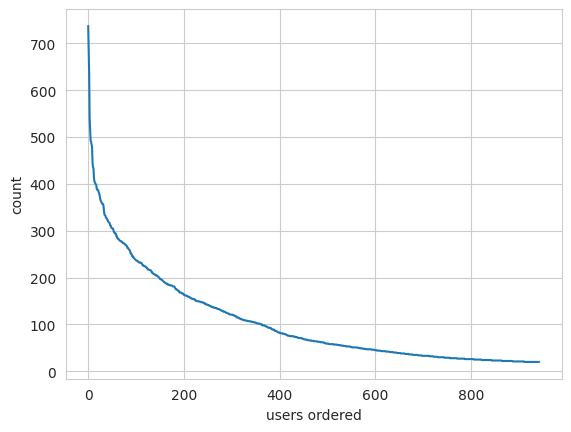

In [ ]:
# three lines of code

**Task 9: Plot the count of users that rated each movie (ordered in descending order)**

Hint: y-axis: number of users, x-axis: item_id

Text(0.5, 0, 'items ordered')

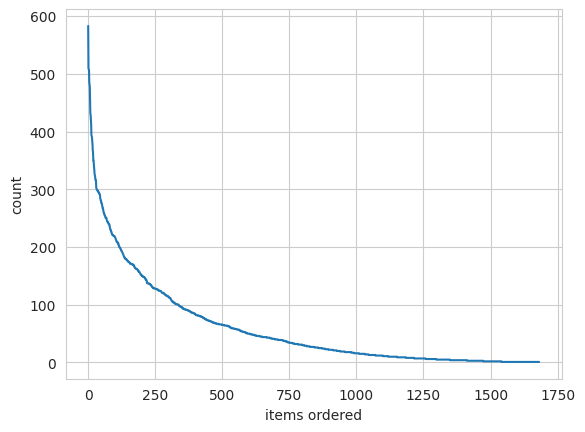

In [ ]:
# three lines of code